In [ ]:
'''
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
'''

import numpy as np
import pandas as pd

from google.colab import files
upload=files.upload()



In [22]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [23]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [24]:
'''
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
'''
df=[]
for i in fraud['Taxable.Income']:
  if i<=30000:
    df.append('good')
  else:
    df.append('risky')

fraud['income']=df



In [25]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,risky
1,YES,Divorced,33700,134075,18,YES,risky
2,NO,Married,36925,160205,30,YES,risky
3,YES,Single,50190,193264,15,YES,risky
4,NO,Married,81002,27533,28,NO,risky
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,risky
596,YES,Divorced,69967,55369,2,YES,risky
597,NO,Divorced,47334,154058,0,YES,risky
598,YES,Married,98592,180083,17,NO,risky


In [26]:
fraud.drop("Taxable.Income",axis=1,inplace=True)
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,risky
1,YES,Divorced,134075,18,YES,risky
2,NO,Married,160205,30,YES,risky
3,YES,Single,193264,15,YES,risky
4,NO,Married,27533,28,NO,risky
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,risky
596,YES,Divorced,55369,2,YES,risky
597,NO,Divorced,154058,0,YES,risky
598,YES,Married,180083,17,NO,risky


In [27]:
fraud.rename(columns = {'Undergrad':'undergrad','Marital.Status':'marital','City.Population':'population','Work.Experience':'experience','Urban':'urban'}, inplace = True)

In [28]:
fraud

,undergrad,marital,population,experience,urban,income
0,NO,Single,50047,10,YES,risky
1,YES,Divorced,134075,18,YES,risky
2,NO,Married,160205,30,YES,risky
3,YES,Single,193264,15,YES,risky
4,NO,Married,27533,28,NO,risky
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,risky
596,YES,Divorced,55369,2,YES,risky
597,NO,Divorced,154058,0,YES,risky
598,YES,Married,180083,17,NO,risky


In [30]:
#label encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fraud['undergrad']= label_encoder.fit_transform(fraud['undergrad'])
fraud['marital']= label_encoder.fit_transform(fraud['marital'])
fraud['urban']= label_encoder.fit_transform(fraud['urban'])
fraud['income']= label_encoder.fit_transform(fraud['income'])



In [33]:
fraud

,undergrad,marital,population,experience,urban,income
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [38]:
#splitting data into x and y
x=fraud.drop("urban",axis=1)
y=fraud['urban']


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


creating model

In [80]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [81]:
model.score(x_test,y_test)

0.4583333333333333

In [82]:
#prediction on test data
pred=model.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [83]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[27, 29],
       [36, 28]])

Text(69.0, 0.5, 'Truth')

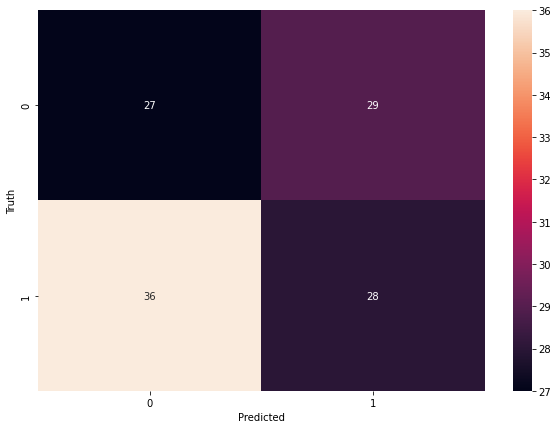

In [85]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')